**Notes**:

Add scaling/centering and discuss why to use or not use scaling.

b) 
- Try noise on Franke function
- Maybe $\beta$ plot should be like in lecture 15sept beta vith deviation. Ask in gruppetime.

**Ex** on Scaling

In [116]:
from sklearn.preprocessing import StandardScaler

#Ex
#  This option does not include the standard deviation
scaler = StandardScaler(with_std=False)
scaler.fit(X)
Xscaled = scaler.transform(X)

#Ex

#The model intercept (called y_scaler) is given by the mean of the target variable (IF X is centered)
#Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler 

## a)

$$\mathbb{E}[y_i]=... $$

$$\mbox{Var}[y_i]=... $$

Using **OLS**: $\mathbf\beta = (X^T X)^{-1}X^T\mathbf{y}$


**Mean**:
$$
\mathbb{E}(\mathbf{\hat{\beta}}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\mathbf{\beta}=\mathbf{\beta}.
$$

**Variance**:

$$
\begin{eqnarray*}
\mbox{Var}(\mathbf{\hat{\beta}}) & = & \mathbb{E} \{ [\mathbf{\beta} - \mathbb{E}(\mathbf{\beta})] [\mathbf{\beta} - \mathbb{E}(\mathbf{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{y} - \mathbf{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{y} - \mathbf{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{y}]^{T} \} - \mathbf{\beta} \, \mathbf{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{y} \, \mathbf{y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \mathbf{\beta} \, \mathbf{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{y} \, \mathbf{y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \mathbf{\beta} \, \mathbf{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \mathbf{\beta} \, \mathbf{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \mathbf{\beta} \, \mathbf{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \mathbf{\beta} \, \mathbf{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \mathbf{\beta} \mathbf{\beta}^T
\\
& = & \mathbf{\beta} \, \mathbf{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \mathbf{\beta} \, \mathbf{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

Used Variance def: $\mbox{Var}[\hat\beta] = \mathbb{E}[(\hat\beta - \mathbb{E}[\hat\beta])^2 ] = \mathbb{E}[(\hat\beta - \mathbb{E}[\hat\beta])(\hat\beta - \mathbb{E}[\hat\beta])^T]$.

## b) 

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error

from mpl_toolkits import mplot3d
%matplotlib inline

In [283]:
#noise for franke function if needed. N(mean=0,variance=1)
def noise(mean, variance):
    return np.random.normal(mean, variance)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 #+ noise(0, 1)


def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

#beta with SVD inverse
def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y


def mean_squared_error(y, y_tilde):
    return (np.square(y - y_tilde)).mean()

#R^2
def score(y, y_tilde):
    return 1 - (np.square(y - y_tilde)).mean() / np.sum(np.square(y - y.mean()))

In [285]:
class ols_on_franke_function:
    def __init__(self, pol_deg):
        self.l = int((pol_deg+2)*(pol_deg+3)/2)
        
        self.n_vals = np.arange(0,pol_deg+1)
        self.R_test = np.zeros(pol_deg+1)
        self.R_train = np.zeros(pol_deg+1)
        self.MSE_test = np.zeros(pol_deg+1)
        self.MSE_train = np.zeros(pol_deg+1)
        self.beta_vals = np.zeros((pol_deg+1, self.l))

    def __call__(self, x, y, z):
        for i in range(len(self.n_vals)):   
            #print(i)
            X = create_X(x, y, n=n)  
            # split in training and test data
            X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)
            clf = skl.LinearRegression().fit(X_train, y_train)
            
            self.R_test[i] = clf.score(X_test, y_test)
            self.R_train[i] = clf.score(X_train, y_train)
            
            self.MSE_test[i] = mean_squared_error(clf.predict(X_test), y_test)
            self.MSE_test[i] = mean_squared_error(clf.predict(X_train), y_train)
            
            beta_fit = fit_beta(X_test, y_test)
            
            self.beta_vals[i] = np.concatenate((beta_fit, np.zeros(len(beta_vals[0])-len(beta_fit))))

            
np.random.seed(4)
pol_deg = 10
N = 40

x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)

ols = ols_on_franke_function(pol_deg)
ols(x,y,z)

plt.plot(ols.n_vals, ols.MSE_test, label="MSE test")
plt.plot(ols.n_vals, ols.MSE_train, label="MSE train")
plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (21,) into shape (78,)

In [139]:






#plotting MSE and R^2 values for degree 5 polynomial
n_vals, R_vals, beta_vals, MSE_training, MSE_test = ols_on_franke_function(5)

plt.xlabel("n")
plt.ylabel("MSE")
plt.plot(n_vals, MSE_training, label="training")
plt.plot(n_vals, MSE_test, label="test")
plt.legend()
plt.show()

plt.xlabel("n")
plt.ylabel("$R^2$")
plt.plot(n_vals, R_vals)

plt.show()

ValueError: too many values to unpack (expected 5)

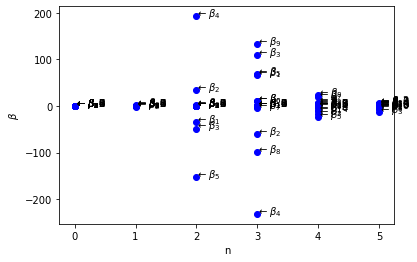

In [121]:
#Plotting beta of polynomial degree

for i in range(len(beta_vals)):
    for j in range(len(beta_vals[0])):
        plt.plot(n_vals[i], beta_vals[i][j], marker="o", color="blue")
        plt.text(n_vals[i], beta_vals[i][j],r'$\leftarrow\beta_{}$'.format(j))
plt.xlabel("n")
plt.ylabel(r"$\beta$")
plt.show()

In [140]:
n_vals, R_vals, beta_vals, MSE_training, MSE_test, y_train, y_test = ols_on_franke_function(polynomial_degree(4)

#sigma_sqrd = np.variance(y_train)


#plt.errorbar(n_vals[2], beta_vals[2])

SyntaxError: invalid syntax (<ipython-input-140-3fe899691326>, line 3)

# c)

Reproduction of 2.11 plot

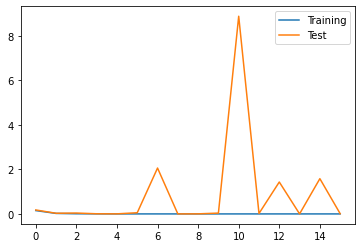

In [114]:
n_vals, R_vals, beta_vals, MSE_training, MSE_test = ols_on_franke_function(15)
plt.plot(n_vals, MSE_training, label="Training")
plt.plot(n_vals, MSE_test, label="Test")
plt.legend()
plt.show()

Assumption for this calculation: y=f(x)+epsilon. And f(x) is assumed to be a deterministic function. This makes $E[f]=f=E[y]$ (unbiased function)

$$
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2\right]=\mathbb{E}\left[(\mathbf{f}+\mathbf{\epsilon}-\mathbf{\tilde{y}})^2\right],
$$

Adding and subtracting $\mathbb{E}\left[\mathbf{\tilde{y}}\right]$

$$
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2\right]=\mathbb{E}\left[(\mathbf{f}+\mathbf{\epsilon}-\mathbf{\tilde{y}}+\mathbb{E}\left[\mathbf{\tilde{y}}\right]-\mathbb{E}\left[\mathbf{\tilde{y}}\right])^2\right],
$$

$$
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2\right]=\mathbb{E}\left[(\mathbf{y}-\mathbb{E}\left[\mathbf{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\mathbf{\tilde{y}}\right]+\sigma^2,
$$

$$
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2\right]=\left(\mbox{Bias}\left[{\tilde y}\right] \right)^2 + \mbox{Var}\left[{\tilde f} \right] + \sigma^2
$$

In [ ]:
from sklearn.utils import resample

In [68]:
# Returns mean of bootstrap samples 
# Bootstrap algorithm
def bootstrap(data, datapoints):
    t = np.zeros(datapoints)
    n = len(data)
    # non-parametric bootstrap         
    for i in range(datapoints):
        t[i] = np.mean(data[np.random.randint(0,n,n)])
    # analysis    
    print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (np.mean(data), np.std(data),np.mean(t),np.std(t)))
    return t

In [70]:
# We set the mean value to 100 and the standard deviation to 15
mu, sigma = 100, 15
datapoints = 10000
# We generate random numbers according to the normal distribution
x = mu + sigma*np.random.randn(datapoints)
# bootstrap returns the data sample                                    
t = bootstrap(x, datapoints)

Bootstrap Statistics :
original           bias      std. error
 99.9538  15.0414        99.9551        0.150526


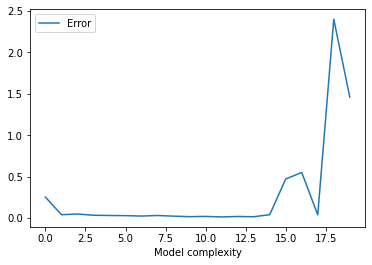

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 70
n_boostraps = 5
maxdegree = 20


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plt.plot(polydegree, error, label='Error')
#plt.plot(polydegree, bias, label='bias')
#plt.plot(polydegree, variance, label='Variance')
plt.xlabel("Model complexity")
plt.legend()
plt.show()

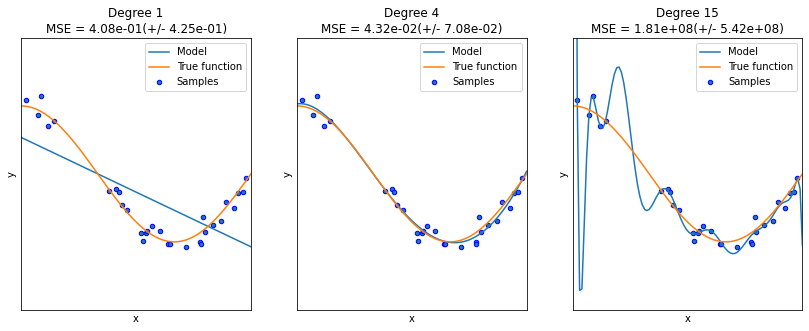

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Error: 0.013121574145794759
Bias^2: 0.012073649463110929
Var: 0.0010479246826838272
0.013121574145794759 >= 0.012073649463110929 + 0.0010479246826838272 = 0.013121574145794755


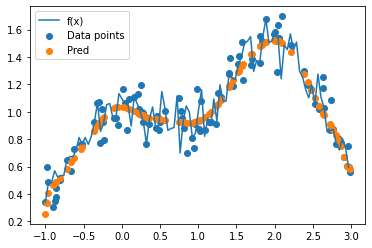

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()

In [100]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set.
n = 1000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree+1):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decide which values of lambda to use
nlambdas = 5
lambdas = np.logspace(-3, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge only
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    Coeffs = np.array(RegRidge.coef_)
    BetaValues = pd.DataFrame(Coeffs)
    BetaValues.columns = ['beta']
    display(BetaValues)
    

,beta
0,1.088022
1,-2.847426
2,12.337245
3,-19.935927
4,10.494674


,beta
0,0.964216
1,-0.433209
2,1.708753
3,-3.695204
4,2.489991


,beta
0,0.954281
1,-0.109899
2,-0.199275
3,-0.221697
4,0.567048


,beta
0,0.917054
1,-0.091875
2,-0.065739
3,0.028050
4,0.147832


,beta
0,0.707048
1,0.147769
2,0.049219
3,0.022155
4,0.015799


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # This is added back by InteractiveShellApp.init_path()


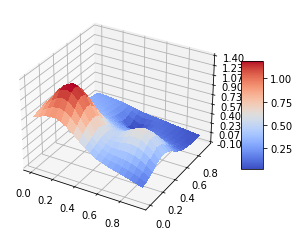

In [122]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()